# Libraries

In [7]:
# import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import string
import json
import nltk
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
#from wordcloud import WordCloud
import matplotlib.colors as mcolors

nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.corpora import Dictionary
from gensim.models import LdaModel

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\calli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\calli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\calli\anaconda3\Lib\site-packages\gensim\matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


# Import data

In [8]:
# load reviews data from file
with open('data/reviews_Video_Games.json') as f:
    reviews_data = [json.loads(line) for line in f][:20000]  # limit to 20000 records

# # preprocess text data
# # remove stop words
# stop_words = set(stopwords.words('english'))
# stemmer = PorterStemmer()
# preprocessed_texts = []
# for review in reviews_data:
#     # tokenize the review texts
#     tokens = word_tokenize(review['reviewText'].lower())
#     # stemming the remaining words using nltk
#     filtered_tokens = [stemmer.stem(token) for token in tokens if token.isalpha() and token not in stop_words]
#     preprocessed_texts.append(filtered_tokens)

# Data preprocessing

In [9]:
# preprocess text data
# remove stop words and perform stemming
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
preprocessed_texts = []
for review in reviews_data:
    # extract the review text and helpfulness
    review_text = review.get('reviewText', '').strip()
    helpfulness = review.get('helpful', [0, 0])
    # skip the review if there is no text
    if not review_text:
        continue
    # convert the helpfulness to binary (helpful or not helpful)
    is_helpful = 1 if helpfulness[0] > 0 and helpfulness[1] > 0 and helpfulness[0] / helpfulness[1] >= 0.5 else 0
    # remove punctuation and special characters, and convert to lowercase
    review_text = review_text.translate(str.maketrans('', '', string.punctuation))
    review_text = review_text.lower()
    # tokenize the review text
    tokens = word_tokenize(review_text)
    # perform stemming and remove stop words
    filtered_tokens = [stemmer.stem(token) for token in tokens if token.isalpha() and token not in stop_words]
    # join the remaining words back into a string
    preprocessed_text = ' '.join(filtered_tokens)
    preprocessed_texts.append((preprocessed_text, is_helpful))

# print the first 10 preprocessed texts
print(preprocessed_texts[:10])

[('havent gotten around play campaign multiplay solid pretti fun includ zero dark thirti pack onlin pass power battlefield beta access', 1), ('want start say never play call duti game second first person shooter game think lot fun good graphic nice stori line take skill get level think player enjoy game three level choos base skill level look first person shooter game current militari type play good buy', 0), ('second medal honor love incorpor real life militari stori game great', 0), ('great game first came still great game', 0), ('first need speed bought year year ago lost bought trip memori lane pretti tame today game brought back memori fun time', 0), ('doesnt load instal tri differ comput wait receiv kind excit', 0), ('love game best fun game work tri laptopif u like race game might like thisit kinda old expect wise graphic grait', 0), ('gift granddaught like game lot prefer listen music sound use hous separ comput lana money well spentprovid hour amus educ', 0), ('review softwar 

In [10]:
# iterate through each line of the file and count the number of lines
num_reviews = 0
with open('data/reviews_Video_Games.json') as f:
    for line in f:
        review = json.loads(line)
        num_reviews += 1

print("Number of reviews:", num_reviews)

Number of reviews: 1324753


In [20]:
# filters the reviews to only include those that have at least one helpful vote
helpful_reviews = [review for review in reviews_data if review['helpful'][1] > 0]

# calculate total number of reviews
num_total_reviews = len(reviews_data)
num_helpful_reviews = len(helpful_reviews)

# calculate percentage of helpful reviews
helpful_percentage = (num_helpful_reviews / num_total_reviews) * 100

print(f"Total number of reviews: {num_total_reviews}")
print(f"Number of helpful reviews: {num_helpful_reviews}")
print(f"Percentage of helpful reviews: {helpful_percentage:.2f}%")

Total number of reviews: 20000
Number of helpful reviews: 12030
Percentage of helpful reviews: 60.15%


# LDA model

In [11]:
# convert the preprocessed text data into a bag of words
# create a dictionary from the preprocessed texts
dictionary = Dictionary([text.split() for text, _ in preprocessed_texts])

# convert the preprocessed texts into a bag of words
bow_corpus = [dictionary.doc2bow(text.split()) for text, _ in preprocessed_texts]

In [12]:
# train LDA model on the bag of words corpus
num_topics = 100
lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

In [37]:
# print top words for each topic
for i in range(num_topics):
    topic_words = lda_model.show_topic(i, topn=10)
    print(f'Topic {i}: {" | ".join([word[0] for word in topic_words])}')

Topic 0: own | night | million | thrill | iti | birthday | period | whenev | diehard | consum
Topic 1: famili | mac | defin | doubl | paid | per | wrap | offens | whole | extend
Topic 2: order | receiv | packag | manual | satisfi | return | pictur | seller | tutori | thoroughli
Topic 3: game | love | recommend | great | would | play | highli | anyon | like | fun
Topic 4: collect | crash | red | gold | bonu | croc | fatal | bandicoot | forgotten | retro
Topic 5: awesom | blood | fear | sport | cours | trick | saturn | mad | chose | ea
Topic 6: copi | softwar | bewar | publish | blade | plagu | public | pathet | buyer | document
Topic 7: complic | blitz | introduct | multi | lay | deathmatch | breath | anytim | goodth | cap
Topic 8: game | seri | gamer | titl | solid | releas | fan | snake | truli | today
Topic 9: adult | futur | monkey | steal | travel | hilari | delight | demon | agent | hair
Topic 10: longer | civil | os | project | batteri | descript | max | wrote | summer | needless

In [44]:
# create visualization of LDA results
vis = gensimvis.prepare(lda_model, bow_corpus, dictionary)
# display the visualization
pyLDAvis.display(vis)

C:\Users\calli\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


# Random Forest model

In [19]:
# convert the bag of words into a sparse matrix
num_terms = len(dictionary)
num_docs = len(bow_corpus)
data = np.zeros((num_docs, num_terms))
for i, doc in enumerate(bow_corpus):
    for j, count in doc:
        data[i, j] = count

In [20]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, [label for _, label in preprocessed_texts], test_size=0.3, random_state=42)

In [21]:
# train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Results

In [22]:
# evaluate the model on the test set
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.6652


Accuracy: 0.6651666666666667
Precision: 0.6496191512513602
Recall: 0.8128451031676838
F1-score: 0.543097566522629


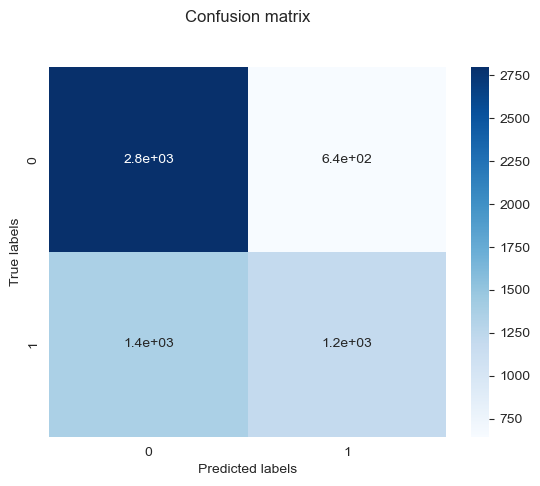

In [23]:
# evaluate the performance of the model using accuracy score and confusion matrix
acc = accuracy_score(y_test, y_pred)
rca = recall_score(y_test, y_pred, pos_label=0)
psc = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", psc)
print("Recall:", rca)
print("F1-score:", f1)

# plot heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title('Confusion matrix', y=1.1)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [ ]:
# # keep only the 'reviewText' and 'helpful' columns
# df = df[['reviewText', 'helpful']]
#
# # remove reviews with missing values
# df = df.dropna()
#
# # convert the 'helpful' column to binary
# df['helpful'] = df['helpful'].apply(lambda x: int(eval(x)[0]/eval(x)[1] >= 0.5))
#
# # Define a function for text preprocessing
# def clean_text(text):
#     # Remove punctuation and special characters
#     text = re.sub('[^a-zA-Z0-9]', ' ', text)
#     # Convert to lowercase
#     text = text.lower()
#     # Tokenize
#     words = nltk.word_tokenize(text)
#     # Remove stop words
#     words = [w for w in words if w not in stopwords.words('english')]
#     # Stemming
#     stemmer = SnowballStemmer('english')
#     words = [stemmer.stem(w) for w in words]
#     # Join the words back into a string
#     text = ' '.join(words)
#     return text
#
# # Apply text preprocessing to the 'reviewText' column
# df['reviewText'] = df['reviewText'].apply(clean_text)
#
# # Convert the 'reviewText' column to a matrix of token counts
# vectorizer = CountVectorizer(max_features=1000)
# X = vectorizer.fit_transform(df['reviewText']).toarray()
#
# # Extract main topics using LDA
# lda = LatentDirichletAllocation(n_components=10)
# X_topics = lda.fit_transform(X)
#
# # Concatenate the token counts and topics matrices
# X = np.concatenate([X, X_topics], axis=1)
#
# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, df['helpful'], test_size=0.2, random_state=42)
#
# # Train a random forest model
# clf = RandomForestClassifier(n_estimators=100)
# clf.fit(X_train, y_train)
#
# # Evaluate the model on the testing set
# y_pred = clf.predict(X_test)
# print(classification_report(y_test, y_pred))